In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h3>Task 1</h3>

In [4]:
df = pd.read_csv('birthday.csv', index_col=0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 1 to 366
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   SYNTYMÄKUUKAUSI  366 non-null    int64
 1   SYNTYMAPÄIVÄ     366 non-null    int64
 2   LUKUMÄÄRÄ        366 non-null    int64
dtypes: int64(3)
memory usage: 11.4 KB


In [6]:
df.rename(columns={
    'SYNTYMÄKUUKAUSI': 'birth_month',
    'SYNTYMAPÄIVÄ': 'birth_day',
    'LUKUMÄÄRÄ': 'frequency'
}, inplace=True)

In [7]:
df.isna().any()

birth_month    False
birth_day      False
frequency      False
dtype: bool

In [8]:
df.head()

,birth_month,birth_day,frequency
1,1,1,26781
2,1,2,17274
3,1,3,17490
4,1,4,17287
5,1,5,17664


In [9]:
df['frequency'].sum().item()

6425572

- So apparently the dataset holds all the birthdays of Finnish people found in väestörekisterikeskus.

**a)**

In [33]:
def sim_bdays(df, n):
    """
    Args:
        df: a dataframe containing the true birthdays
        n: the number of people we simulate birthdays for
    
    Returns:
        bool: True if at least two people share the same birthday, False otherwise.
    """
    # Make a copy of the original dataframe
    data = df.copy(deep=True)
    
    # The probability of being born in a given month and day
    data['prob'] = data['frequency'] / data['frequency'].sum()
    
    # Simulate birthdays for n people based on the true distribution of birthdays
    simulated_bdays = np.random.choice(a=data.index, size=n, p=data['prob'])
    
    # Check if anyone have the same birthday.
    # set is a function that returns unique elements of an object,
    # so if the lenght of the vector set(simulated_birthdays) < n,
    # we know that there are at least two people who share the same birthday
    unique_bdays= set(simulated_bdays)
    return len(unique_bdays) < n

**b)**

In [23]:
def prop_duplicate_bdays(df, m, n):
    """
    Args:
        df: a dataframe containing the true birthdays
        m: the number of simulations
        n: the number of people we simulate birthdays for
        
    Returns:
        float: the proportion of simulations where at least 
        two persons share a birthday.
    """
    duplicate_count = 0
    for i in range(m):
        if sim_bdays(df, n):
            duplicate_count += 1
    return duplicate_count / m

**c)**

In [32]:
for i in range(2, 31):
    print(f'n={i}, {prop_duplicate_bdays(df, m=1000, n=i)}')

n=2, 0.005
n=3, 0.009
n=4, 0.016
n=5, 0.017
n=6, 0.048
n=7, 0.065
n=8, 0.068
n=9, 0.104
n=10, 0.128
n=11, 0.16
n=12, 0.185
n=13, 0.202
n=14, 0.229
n=15, 0.276
n=16, 0.303
n=17, 0.317
n=18, 0.35
n=19, 0.378
n=20, 0.404
n=21, 0.444
n=22, 0.464
n=23, 0.486
n=24, 0.549
n=25, 0.616
n=26, 0.6
n=27, 0.599
n=28, 0.651
n=29, 0.681
n=30, 0.706


**d)**

In [48]:
def sim_bdays_uniform(df, n):
    """
    Args:
        df: a dataframe containing the true birthdays
        n: the number of people we simulate birthdays for
    
    Returns:
        bool: True if at least two people share the same birthday, False otherwise.
    """
    simulated_bdays = np.random.choice(a=np.arange(1,366), size=n, p=[1/365]*365)
    unique_bdays= set(simulated_bdays)
    return len(unique_bdays) < n

In [49]:
def prop_duplicate_bdays_uniform(df, m, n):
    """
    Args:
        df: a dataframe containing the true birthdays
        m: the number of simulations
        n: the number of people we simulate birthdays for
        
    Returns:
        float: the proportion of simulations where at least 
        two persons share a birthday.
    """
    duplicate_count = 0
    for i in range(m):
        if sim_bdays_uniform(df, n):
            duplicate_count += 1
    return duplicate_count / m

In [54]:
for i in range(2, 31):
    print(f'n={i}, {prop_duplicate_bdays_uniform(df, m=1000, n=i)}')

n=2, 0.005
n=3, 0.008
n=4, 0.02
n=5, 0.037
n=6, 0.036
n=7, 0.061
n=8, 0.066
n=9, 0.104
n=10, 0.114
n=11, 0.132
n=12, 0.198
n=13, 0.207
n=14, 0.234
n=15, 0.258
n=16, 0.283
n=17, 0.329
n=18, 0.329
n=19, 0.379
n=20, 0.406
n=21, 0.421
n=22, 0.475
n=23, 0.491
n=24, 0.525
n=25, 0.585
n=26, 0.613
n=27, 0.644
n=28, 0.663
n=29, 0.687
n=30, 0.709


- Well, as can be seen, the results are highly similar.

<h3>Task 2</h3>

We'll use [inverse transform sampling](https://en.wikipedia.org/wiki/Inverse_transform_sampling) to generate $\, n = 10000 \,$ independent samples from this distribution.

$$
p_{X}(x) =
\begin{cases} 
x & \text{, } 0 < x \le 1, \\
2 - x & \text{, } 1 < x \le 2, \\
0 & \text{, else.}
\end{cases}
$$

CDF is the ingtegral of PDF. That is,

$$ F_{X}(x) = P(X \le x) = \int_{-\infty}^{x} f(t) \, dt. $$

Calculating some integrals, the CDF is

$$
F_{X}(x) =
\begin{cases} 
0 & \text{, } x \le 0 \\
\frac{x^2}{2} & \text{, } 0 < x \le 1, \\
2x - \frac{x^2}{2} - 1 & \text{, } 1 < x \le 2, \\
1 & \text{, } x > 2.
\end{cases}
$$

For any random variable $\, X \in \mathbb{R}, \,$ the random variable $\, F_{X}^{-1}(U) \,$ has the same distribution as $\, X, \,$ where $\, F_{X}^{-1}(U) \,$ is the generalized inverse of $\, F_{X} \,$ and $\, U \,$ is uniform on the closed range [0,1].

We want to find a transformation $\, T : [0,1] \rightarrow \mathbb{R} \,$ such that $\, T(U) = X. \,$

$$ F_{X} = P(X \le x) = P(T(U) \le x) = P(U \le T^{-1}(x)) = T^{-1}(x), $$

where the last equality follows because we are dealing with a uniform distribution. So we have

$$ F_{X}(x) = T^{-1}(x) \Leftrightarrow F_{X}^{-1} = T(x). $$

$0 < x \le 1:$

\begin{equation*}
    u = \frac{x^2}{2} \quad \Leftrightarrow \quad x = \sqrt{2u}
\end{equation*}

$1 < x \le 2:$

\begin{equation*}
    u = 2x - \frac{x^2}{2} - 1 \quad \Leftrightarrow \quad x = 2 - \sqrt{2 \, (1-u)}
\end{equation*}

In [77]:
def p_X(x):
    return np.maximum(0, 1 - np.abs(1 - x))

In [110]:
def sample_pdf(n):
    """
    This function draws samples from the distribution specified above (PDF).
    """
    # Draw n samples from [0,1] uniform distribution
    u = np.random.uniform(low=0.0, high=1.0, size=n)
    
    # An array to store the transformed samples 
    samples = np.zeros_like(u)
    
    # 0 < x <= 1 --> 0 < u <= 0.5
    mask1 = u <= 0.5
    
    # < x <= 2 --> 0.5 < u <= 1
    mask2 = u > 0.5
    
    # Fancy indexing
    samples[mask1] = np.sqrt(2 * u[mask1])
    samples[mask2] = 2 - np.sqrt(2 * (1 - u[mask2]))
    
    # Plotting
    x = np.linspace(-0.5, 2.5, 1000)
    pdf = p_X(x)
    plt.figure(figsize=(8,6))
    plt.plot(x, pdf, color='red', zorder=2)
    plt.hist(samples, density=True, bins=50, edgecolor='black', zorder=1)

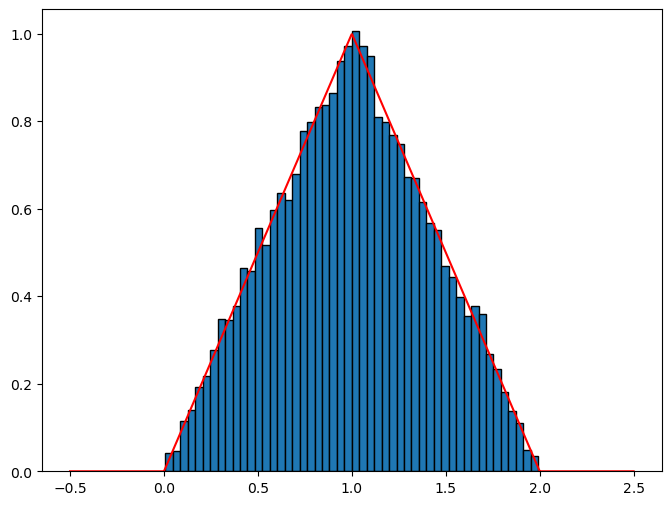

In [111]:
sample_pdf(n=10000)

``` python
mask1 = u < 0.5
samples[mask1] = ...
```

this is called fancy indexing (specifically with numpy arrays). Breakdown:

- `mask1`: boolean mask, where each element is True if the condition u < 0.5 is met.
- `samples[mask1]`: this uses the boolean mask `mask1` to select specific elements from the `samples` array where the condition u < 0.5 is True.
- Assignment: the expression `samples[mask1] = ...` assigns the computed values at the masked indices back to the corresponding indices of `samples`.

<h3>Fancy indexing example</h3>

In [122]:
u = np.random.uniform(size=5)
mask = u < 0.5
samples = np.zeros_like(u)

In [123]:
u

array([0.21357616, 0.36175416, 0.64984048, 0.27594643, 0.58051826])

In [124]:
samples

array([0., 0., 0., 0., 0.])

In [125]:
mask

array([ True,  True, False,  True, False])

In [126]:
samples[mask]

array([0., 0., 0.])

In [127]:
samples[mask] = 10

In [128]:
samples

array([10., 10.,  0., 10.,  0.])